In [1]:
from google.colab import files

uploaded = files.upload()

Saving ca-AstroPh.txt.gz to ca-AstroPh.txt.gz


In [3]:
import networkx as nx
import gzip
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [4]:
with gzip.open('ca-AstroPh.txt.gz', 'rb') as f:
    data = f.readlines()

In [5]:
node_pairs = []
labels = []

with gzip.open('ca-AstroPh.txt.gz', 'rb') as f:
    for line in f:
        line = line.decode('utf-8').strip()
        if line.startswith('#') or len(line) == 0:
            continue
        source, target = line.split('\t')
        node_pairs.append((source, target))
        labels.append(1)

print("Exemple de paires de nœuds et de labels :")
for pair, label in zip(node_pairs[:5], labels[:5]):
    print(pair, label)


Exemple de paires de nœuds et de labels :
('84424', '276') 1
('84424', '1662') 1
('84424', '5089') 1
('84424', '6058') 1
('84424', '6229') 1


In [11]:
import gzip
import networkx as nx

G = nx.Graph()

for line in data:
    if line.decode('utf-8').startswith("#"):
        continue

    line = line.decode('utf-8').strip()

    source, target = line.split('\t')

    
    G.add_edge(source, target)

print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 18772
Number of edges: 198110


In [12]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.array([(G.degree(node1), G.degree(node2)) for node1, node2 in node_pairs])

y = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
knn_model = KNeighborsClassifier(n_neighbors=5)


In [14]:
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [15]:
y_pred = knn_model.predict(X_test)


In [16]:
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle KNN :", accuracy)

Précision du modèle KNN : 1.0


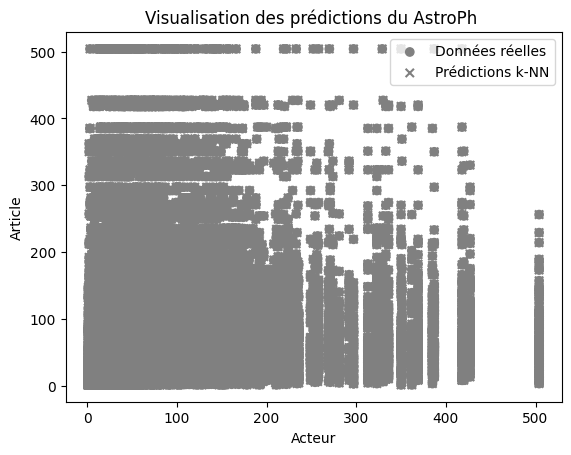

In [19]:
import numpy as np
import matplotlib.pyplot as plt

colors = np.array(['blue', 'Gray'])

plt.scatter(X_test[:, 0], X_test[:, 1], color=colors[y_test], label='Données réelles')

plt.scatter(X_test[:, 0], X_test[:, 1], color=colors[y_pred], marker='x', label='Prédictions k-NN')

plt.xlabel('Acteur')
plt.ylabel('Article')
plt.title('Visualisation des prédictions du AstroPh ')
plt.legend()

plt.show()
